Performance of the SP500, FTSE MIB, DOW JONES and NASDAQ over the last 2 years

"^GSPC"= S&P500
"FTSEMIB.MI"= FTSEMIB
"^DJI"= DOW JONES
"^IXIC"=NASDAQ

In [1]:
import pandas as pd
from ipywidgets import widgets as wg
import yfinance as yf
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook'

tickers = ["^GSPC", "FTSEMIB.MI", "^DJI", "^IXIC"]

df = yf.download(
        tickers=tickers,
        period="3y",
        interval="1wk",
        group_by="column")
        
df.head(5)

[*********************100%***********************]  4 of 4 completed


Adj Close                                              Close  \
           FTSEMIB.MI          ^DJI        ^GSPC        ^IXIC FTSEMIB.MI   
Date                                                                       
2019-02-11    20212.0  25883.250000  2775.600098  7472.410156    20212.0   
2019-02-18    20263.0  26031.810547  2792.669922  7527.540039    20263.0   
2019-02-25    20695.0  26026.320312  2803.689941  7595.350098    20695.0   
2019-03-04    20484.0  25450.240234  2743.070068  7408.140137    20484.0   
2019-03-11    21045.0  25848.869141  2822.479980  7688.529785    21045.0   

                                                         High                \
                    ^DJI        ^GSPC        ^IXIC FTSEMIB.MI          ^DJI   
Date                                                                          
2019-02-11  25883.250000  2775.600098  7472.410156    20271.0  25883.720703   
2019-02-18  26031.810547  2792.669922  7527.540039    20361.0  26052.900391   
2019-02-25  26026.320312  2803.689941  7595.350098    20836.0  26241.419922   
2019-03-04  25450.240234  2743.070068  7408.140137    21010.0  26155.980469   
2019-03-11  25848.869141  2822.479980  7688.529785    21112.0  25927.910156   

            ...          Low                    Open                \
            ...        ^GSPC        ^IXIC FTSEMIB.MI          ^DJI   
Date        ...                                                      
2019-02-11  ...  2703.790039  7290.029785    19435.0  25142.810547   
2019-02-18  ...  2764.550049  7430.890137    20232.0  25849.849609   
2019-02-25  ...  2775.129883  7485.390137    20428.0  26126.150391   
2019-03-04  ...  2722.270020  7332.919922    20820.0  26122.189453   
2019-03-11  ...  2747.610107  7442.399902    20588.0  25208.000000   

                                          Volume                           \
                  ^GSPC        ^IXIC  FTSEMIB.MI        ^DJI        ^GSPC   
Date                                                                        
2019-02-11  2712.399902  7327.370117  2379447100  1424680000  18338580000   
2019-02-18  2769.280029  7450.750000  2188889100  1103970000  14356680000   
2019-02-25  2804.350098  7585.299805  2391807100  1423240000  19586400000   
2019-03-04  2814.370117  7636.620117  2506963800  1363660000  18620090000   
2019-03-11  2747.610107  7442.560059  2515573000  1878630000  20361870000   

                         
                  ^IXIC  
Date                     
2019-02-11  10477050000  
2019-02-18   8839310000  
2019-02-25  12154480000  
2019-03-04  11641280000  
2019-03-11  12378400000  

[5 rows x 24 columns]

In [2]:
df = df.filter(regex="Adj Close")
df = df.dropna()
df.head(5)

Adj Close                                        
           FTSEMIB.MI          ^DJI        ^GSPC        ^IXIC
Date                                                         
2019-02-11    20212.0  25883.250000  2775.600098  7472.410156
2019-02-18    20263.0  26031.810547  2792.669922  7527.540039
2019-02-25    20695.0  26026.320312  2803.689941  7595.350098
2019-03-04    20484.0  25450.240234  2743.070068  7408.140137
2019-03-11    21045.0  25848.869141  2822.479980  7688.529785

<AxesSubplot:xlabel='Date'>

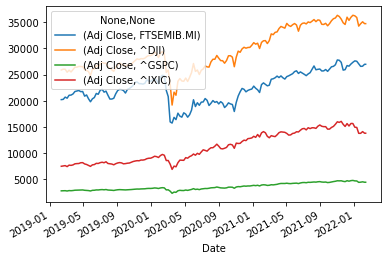

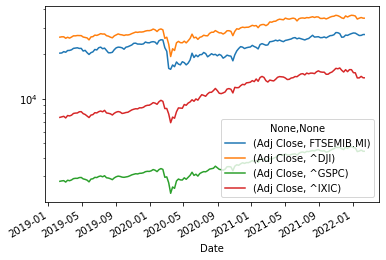

In [3]:
df.plot()
df.plot(logy=True)

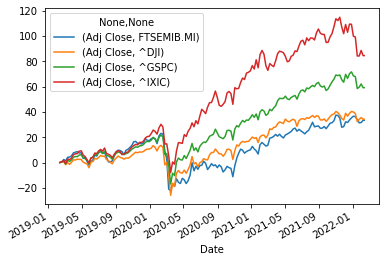

In [4]:
# use the first date as index 
reference_value = df.iloc[0]
# dividing by the series divides each column by the 
# corresponding element in the series
tmp_df = df.div(reference_value) * 100 - 100
tmp_df.plot()
prepared_df = df.copy()

In [5]:
def create_indexed_columns(date, df, top_level_name=""):
    """Returns indexed columns for given dataframe"""

    # find index of the date that is closest to our reference date
    closest_date_index = df.index.get_loc(date, method="nearest")

    # get the values in the initial columns for the reference date 
    reference_values = df.iloc[closest_date_index]['Adj Close']

    # divide initial columns by values at ref. date and store in intermediate df
    inter_df = df['Adj Close'].div(reference_values)*100 - 100

    # create a multindex for the intermediate df using the date as top-level index
    closest_date = df.index[closest_date_index]
    inter_df.columns = pd.MultiIndex.from_product(
                    [[top_level_name if top_level_name else str(closest_date)], inter_df.columns])
    
    return inter_df, closest_date

In [6]:
# create copy of initial dataframe
df = prepared_df.copy()

def create_traces_for_date(date, df):
    """Indexes dataframe to given date and returns list of traces."""

    trace_list = []
    calculated_df, _ = create_indexed_columns(date, df)
    for trace in calculated_df.columns:
        datadict = dict(
            name=trace[1],
            type="scatter",
            x=calculated_df.index,
            y=calculated_df[trace],
            yaxis="y"
        )
        trace_list.append(datadict)
    reference_line = create_reference_line(
        x=date, name=date.strftime('%Y-%m-%d'))
    return trace_list + [reference_line]

In [10]:
ref_dict = {"Corona stock market drop": "2020-02-14", "First vaccine approvation": "2020-12-21"}

In [11]:
# tmp_dict for storing updated reference date dict entries
tmp_dict = {}
fixed_df = df.copy()

for ref_name, ref_date in ref_dict.items():
    # create intermediate df for reference date
    inter_df, closest_date = create_indexed_columns(ref_date, fixed_df, top_level_name=ref_name)
    
    fixed_df = fixed_df.join(inter_df)
    tmp_dict.update(
        {ref_name: dict(
            initial_date=ref_name,
            closest_date=closest_date)}
    )

# update values in original dict
ref_dict.update(tmp_dict)

In [13]:
ref_date_fig = go.Figure()

# loop over reference dates
for ref_name in ref_dict.keys():
    # loop over tickers for reference date
    for ticker in fixed_df[ref_name].columns:
        ref_date_fig.add_scatter(
            x=fixed_df.index,
            y=fixed_df[ref_name, ticker],
            name=ticker, 
            meta=dict(reference_date=ref_name)
        )


ref_date_fig.show()

In [15]:
def create_visibility_array(ref_date):
    """
    Returns array of boolean values representing the
    visibility array of figure traces. Traces with the 
    same meta value as 'ref_date' are set to 'True'.
    """

    return [True if trace['meta']['reference_date'] == ref_date 
            else False for trace in ref_date_fig['data']]

In [17]:
def create_buttons():
    """Returns list of button objects."""
    
    button_list = []
    for ref_date in ref_dict.keys():
        ref_button = dict(
            label=ref_date, 
            method="restyle",
            args=[dict(
                visible=create_visibility_array(ref_date))]
        )
        button_list.append(ref_button)
    return button_list

In [19]:
ref_date_fig.update_layout(
    updatemenus=[dict(buttons=create_buttons())])
    
# hide traces on initialization, by default all traces are shown
ref_date_fig.update_traces(visible=False)
ref_date_fig.update_traces(
    visible=True,
    selector=dict(meta={'reference_date': list(ref_dict.keys())[0]})
    )

ref_date_fig.show()

In [21]:
def style_plot(figure):
    """Provides basic layout attributes for given figure."""

    figure.update_layout(
        title=f"Relative growth of index prices for {df.index[0].strftime('%B %Y')} - " \
              +                f"{df.index[-1].strftime('%B %Y')}",
        hovermode="x",
        # D3 formatting. Adds a percentage sign and rounds numbers to 1 decimal after decimal point.
        yaxis1=dict(ticksuffix=" %", tickformat="+.1f", title="Relative growth"),
        yaxis2=dict(
            fixedrange=True,
            overlaying="y",
            range=[0, 1],
            visible=False,
        ),
        xaxis=dict(title="Date")
    )

style_plot(ref_date_fig)

In [22]:
def create_reference_line(x, name, meta=""):
    """Returns a dictionary that defines a 
    black line bound to the secondary yaxis.
    """

    ref_line = dict(
        x=[x, x],
        y=[0, 1],
        name=name,
        yaxis="y2",
        mode="lines",
        type="scatter",
        line=dict(
            color="black",
            width=0.5
        ),
        meta=meta
    )
    return ref_line

In [23]:
for ref_key, ref_value in ref_dict.items():
    ref_date_fig.add_trace(go.Scatter(
        create_reference_line(
            x=ref_value['closest_date'],
            name=ref_value['closest_date'].strftime("%Y-%m-%d"), 
            meta=dict(reference_date=ref_key)
            )
        ))


ref_date_fig.update_layout(
    updatemenus=[dict(buttons=create_buttons(), x=-0.12)])

# hide traces on initialization, by default all traces are shown
ref_date_fig.update_traces(visible=False)
ref_date_fig.update_traces(
    visible=True,
    selector=dict(meta={'reference_date': list(ref_dict.keys())[0]})
    )
    
ref_date_fig.show()